<a href="https://www.kaggle.com/code/angelchaudhary/predicting-customer-churn-for-a-telecom?scriptVersionId=293149816" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting Customer Churn for a Telecom / SaaS Company Using Machine Learning and Explainable AI

## Problem Statement

For subscription-based businesses like Telecom and SaaS companies, losing customers (churn) is one of the biggest silent revenue killers. Acquiring a new customer costs significantly more than retaining an existing one, yet most companies only realize churn after the customer has already left. The goal of this case study is to predict which customers are likely to churn before they actually do, so that the business can take proactive actions such as offering discounts, improving service, or targeted retention campaigns.

Churn prediction is one of the most widely used machine learning problems in real businesses:
- Telecom companies use it to reduce customer drop-offs  
- SaaS companies use it to protect recurring revenue  
- Product teams use it to improve user experience  

In this notebook, we will:

- Analyze customer behavior and identify churn patterns  
- Handle class imbalance between churned and retained users  
- Train a classification model to predict churn  
- Evaluate the model using business-relevant metrics  
- Explain why the model predicts churn using feature importance and SHAP  

## Approach

1. **Exploratory Data Analysis (EDA)** to understand churn drivers  
2. **Feature engineering & preprocessing**  
3. **Model training** using classification algorithms  
4. **Model evaluation** with precision, recall, ROC-AUC  
5. **Explainability** using SHAP to interpret predictions  

# LET'S DO IT!!!!
![FUNNY GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExeTU1NDF4MzN5emwycWt4ejg0OGl5YnMxNXZhd3cyc3pydzcyMmthZyZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/ZEUODEtQiUZWGg6IHR/giphy.gif)

## Dataset Overview

This dataset contains **customer-level data from a Telecom company**, where each row represents one customer and their interaction with the company’s services.
The goal is to predict whether a customer will **churn (leave the company)** or remain active.

### Target Variable

- **`Churn`**
  - `Yes` → Customer left the company  
  - `No` → Customer is still active  

The dataset captures multiple dimensions of customer behavior:

| Category | Description |
|--------|-------------|
| **Customer Profile** | Gender, senior citizen, partner, dependents |
| **Account Details** | Tenure, contract type, payment method |
| **Services Used** | Internet service, phone service, streaming, security |
| **Billing Information** | Monthly charges, total charges |
| **Target** | Whether the customer churned |


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("barun2104/telecom-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telecom-churn


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("/kaggle/input/telecom-churn/telecom_churn.csv")
df.head(2)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

## Visualization

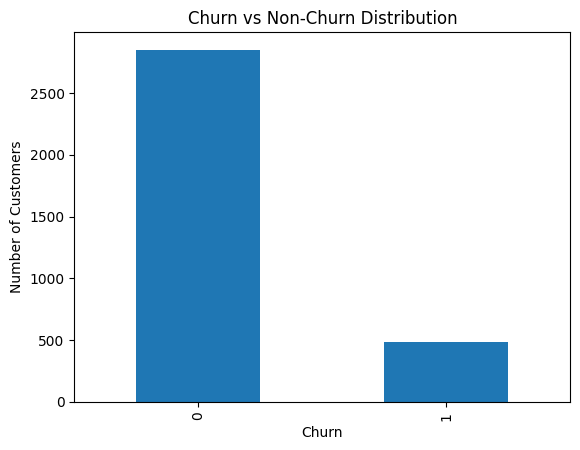

In [7]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn vs Non-Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

### Churn Distribution — Observation

The dataset is **highly imbalanced**. A large majority of customers have **not churned (0)**, while only a small fraction have **churned (1)**.

This means that:
- Churn is a **rare but important event**
- A naive model that predicts “No Churn” for every customer would still achieve high accuracy, but would be **useless for business**

Therefore, **accuracy alone cannot be trusted** for this problem.  
We must use metrics like **Recall, Precision, and ROC-AUC** to properly evaluate how well the model detects churners. This imbalance also means we may need **class weighting or resampling techniques** when training the model.

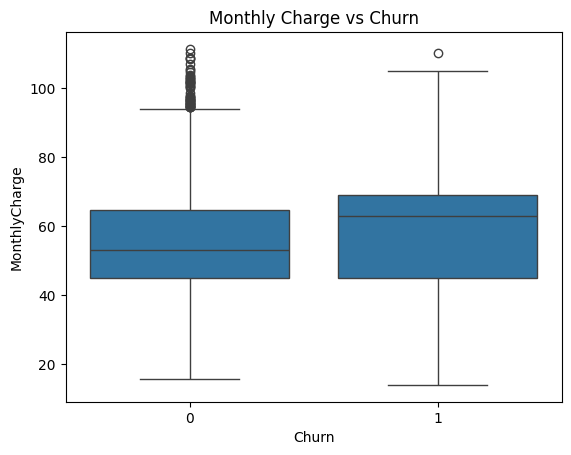

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Churn", y="MonthlyCharge", data=df)
plt.title("Monthly Charge vs Churn")
plt.show()

####  Monthly Charges vs Churn — Observation

Customers who churn tend to have **higher monthly charges** compared to customers who stay.The median monthly bill for churned users is visibly higher than that of retained users, and churned customers also show a **wider spread of high charges**.
This suggests that:
- Customers paying more are **more price-sensitive**
- High bills increase dissatisfaction and the likelihood of leaving

From a business perspective, this means:
> High-paying customers are **at higher risk**, so they should be prioritized for **discounts, loyalty plans, or personalized retention offers**.

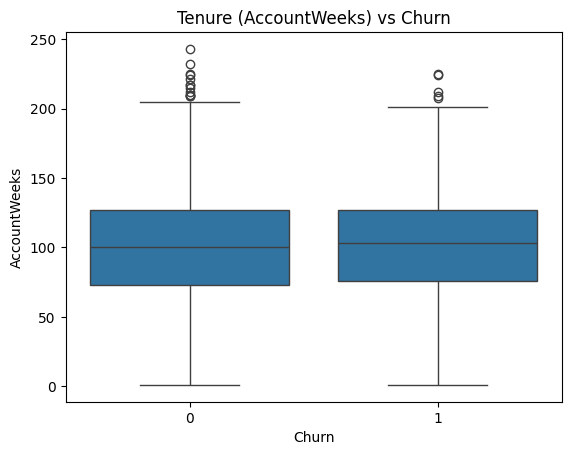

In [9]:
sns.boxplot(x="Churn", y="AccountWeeks", data=df)
plt.title("Tenure (AccountWeeks) vs Churn")
plt.show()

#### Tenure (Account Weeks) vs Churn — Observation

The distribution of tenure for churned and non-churned customers is **very similar**. Both groups have roughly the same median account age.
This indicates that:
- Customers do **not necessarily churn only when they are new**
- Even long-term customers can leave if they become dissatisfied

So, churn in this dataset is driven more by **experience and pricing** rather than just customer age.

This means retention strategies should focus on:
> Improving service quality and pricing fairness — not just onboarding.

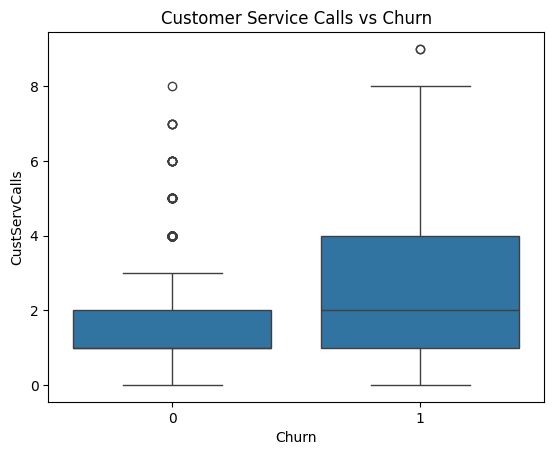

In [10]:
sns.boxplot(x="Churn", y="CustServCalls", data=df)
plt.title("Customer Service Calls vs Churn")
plt.show()

#### Customer Service Calls vs Churn — Observation

Customers who churn make **significantly more customer service calls** than customers who stay. The median number of service calls for churned users is higher, and churned customers also show **many extreme values**, indicating repeated complaints or unresolved issues.
This suggests:
- Frequent support calls are a **strong signal of dissatisfaction**
- Customers who have to contact support multiple times are far more likely to leave

From a business perspective:
> High-support customers should be flagged early and routed to **priority resolution teams** to prevent churn.

In [11]:
import pandas as pd

pd.crosstab(df["ContractRenewal"], df["Churn"], normalize="index")

Churn,0,1
ContractRenewal,,
0,0.575851,0.424149
1,0.885050,0.114950


#### Contract Renewal vs Churn — Observation

Customers without contract renewal have a **very high churn rate (~42%)**, while customers with contract renewal rarely churn (~11%). This shows that **long-term contracts strongly protect against churn**.

In [12]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y   
)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight="balanced", max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [16]:
# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score

y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       713
           1       0.34      0.73      0.46       121

    accuracy                           0.76       834
   macro avg       0.64      0.74      0.65       834
weighted avg       0.86      0.76      0.79       834

ROC-AUC: 0.8142756134595991


## Logistic Regression — Model Performance

The model achieves a **ROC-AUC of 0.81**, indicating strong ability to distinguish between churned and non-churned customers.
For churners (class 1):
- **Recall = 0.73** → The model correctly identifies **73% of customers who will leave**
- **Precision = 0.34** → Many predicted churners are false alarms, which is acceptable for retention campaigns

This is ideal for business because:
> It is better to wrongly flag a few loyal customers than to miss a real churner.

Overall, this model provides a **solid early-warning system** for churn.

## Feature Importance (coefficients)

In [17]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

feature_importance

,Feature,Coefficient
4,CustServCalls,0.793961
5,DayMins,0.488070
7,MonthlyCharge,0.278884
8,OverageFee,0.262115
9,RoamMins,0.170537
0,AccountWeeks,0.065151
6,DayCalls,0.054832
3,DataUsage,-0.087124
2,DataPlan,-0.517549
1,ContractRenewal,-0.698646


### Feature Importance — Logistic Regression

The coefficients show how each feature affects the probability of churn.

####  Factors that increase churn
- **Customer Service Calls** is the strongest churn driver  
- **High Day Minutes and Monthly Charges** significantly raise churn risk  
- **Overage and Roaming usage** also push customers toward leaving  

These represent **cost, friction, and dissatisfaction**.

####  Factors that reduce churn
- **Contract Renewal** is the strongest churn protector  
- **Data Plan** lowers churn risk  
- Longer **account tenure** provides slight stability  

This confirms a clear business story:
> Customers stay when they are locked into contracts and on plans, but leave when they face high bills or frequent service issues.

In [18]:
!pip install shap

## SHAP Explainability

In [19]:
import shap

explainer = shap.Explainer(log_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

### Global Feature Importance 

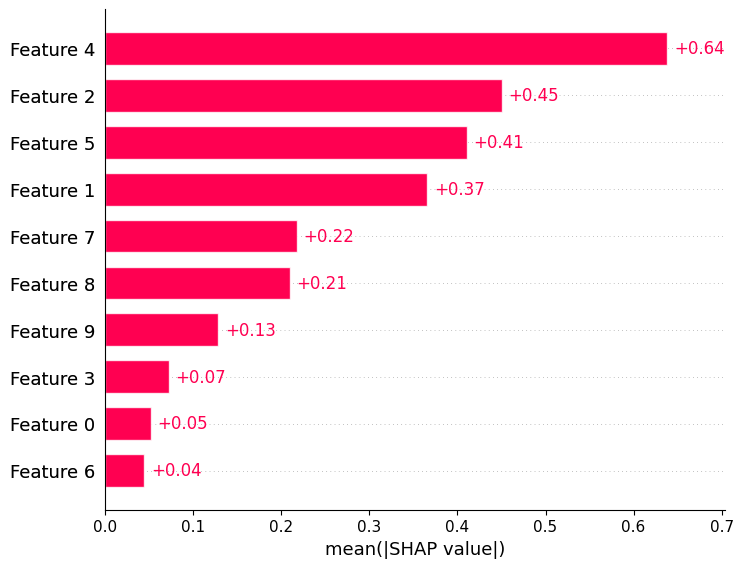

In [20]:
shap.plots.bar(shap_values, max_display=10)

The SHAP bar plot shows that **Customer Service Calls, Data Plan, Day Minutes, Monthly Charges, and Contract Renewal** are the most influential features in predicting churn. This confirms that **customer dissatisfaction (support calls)** and **pricing & usage behavior** drive churn more than demographic or basic account details. 

### Individual Prediction Explanation

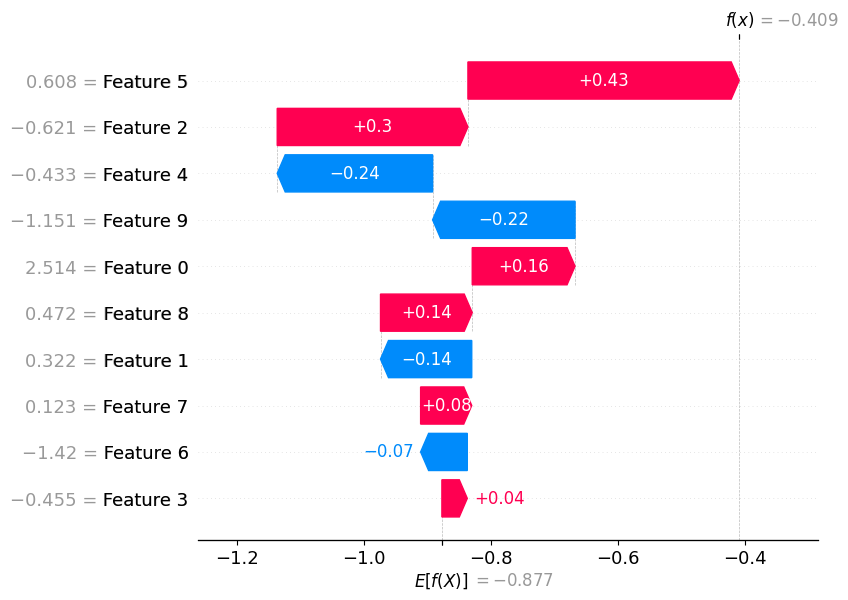

In [21]:
shap.plots.waterfall(shap_values[0])

For this customer, the prediction is driven mainly by **high usage and billing-related features**, which push the churn probability upward. At the same time, some factors such as **contract and service-related features** reduce the churn risk, partially offsetting it. This shows how SHAP can explain **exactly why a specific customer is predicted to churn**, making the model transparent and actionable.

## Conclusion

In this case study, we built a complete end-to-end **churn prediction system** for a Telecom company.

We discovered that churn is primarily driven by:
- **High customer service calls**
- **High monthly charges and usage**
- **Lack of contract renewal**

A Logistic Regression model achieved a strong **ROC-AUC of 0.81**, successfully identifying **73% of customers who would churn**, making it highly effective as an early warning system.

Using **SHAP**, we added full explainability, allowing us to understand both:
- What drives churn across the entire customer base  
- Why a specific customer is predicted to leave  

This turns the model into a **business decision tool** that can guide:
- Retention campaigns  
- Pricing strategies  
- Customer support prioritization  

By acting on these insights, companies can significantly **reduce revenue loss and improve customer loyalty**.